In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('EasyVisa.csv')

In [3]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
data.shape

(25480, 12)

In [5]:
# continent 
data['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

<Axes: xlabel='case_status'>

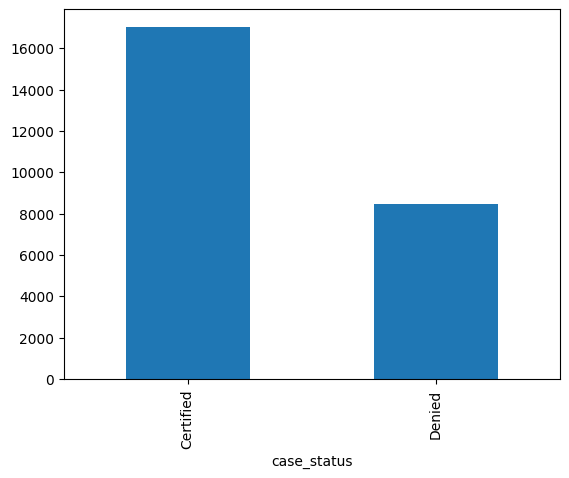

In [9]:
# data imbalance check 
data['case_status'].value_counts().plot.bar()

<Axes: xlabel='education_of_employee'>

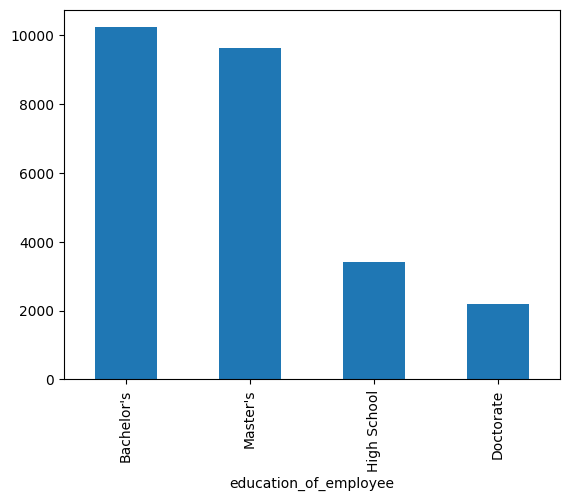

In [11]:
# education 
data['education_of_employee'].value_counts().plot.bar()

<Axes: xlabel='has_job_experience'>

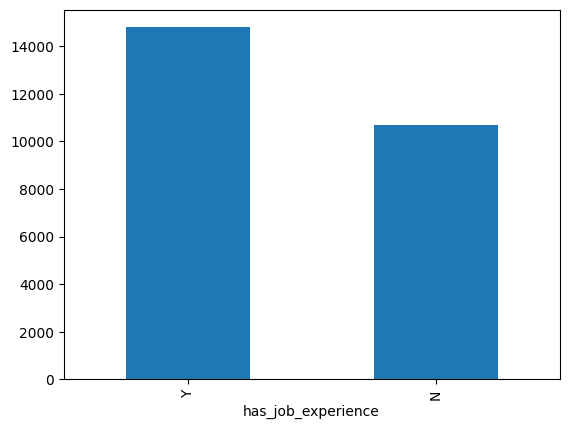

In [13]:
# job expereince

data['has_job_experience'].value_counts().plot.bar()

#### experinced people are more than not experienced in all education background

<Axes: xlabel='education_of_employee', ylabel='percent'>

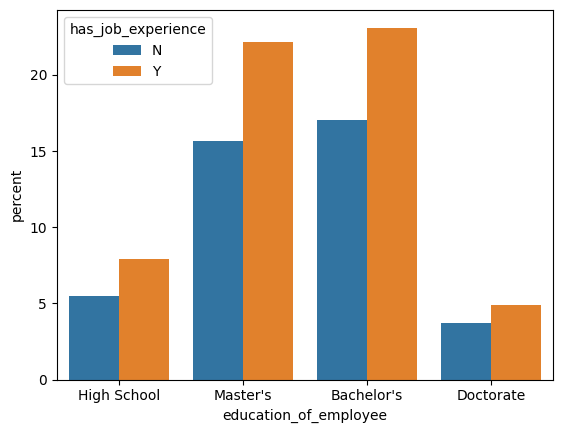

In [16]:
sns.countplot(x='education_of_employee', data=data, hue='has_job_experience', stat='percent')

#### very less no of people require job training for both experieced and not experienced person 

<Axes: xlabel='has_job_experience', ylabel='count'>

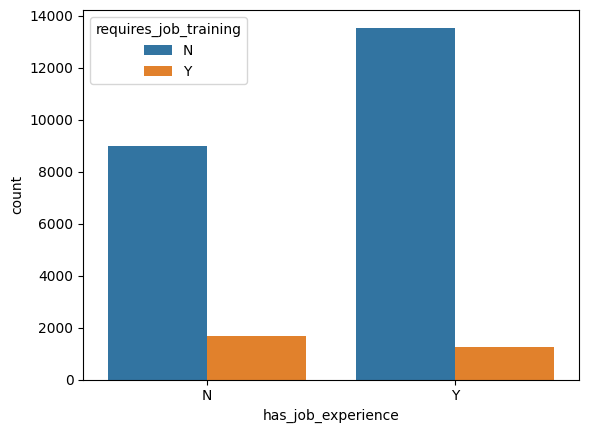

In [29]:
sns.countplot(x='has_job_experience', data=data, hue='requires_job_training', stat='count')

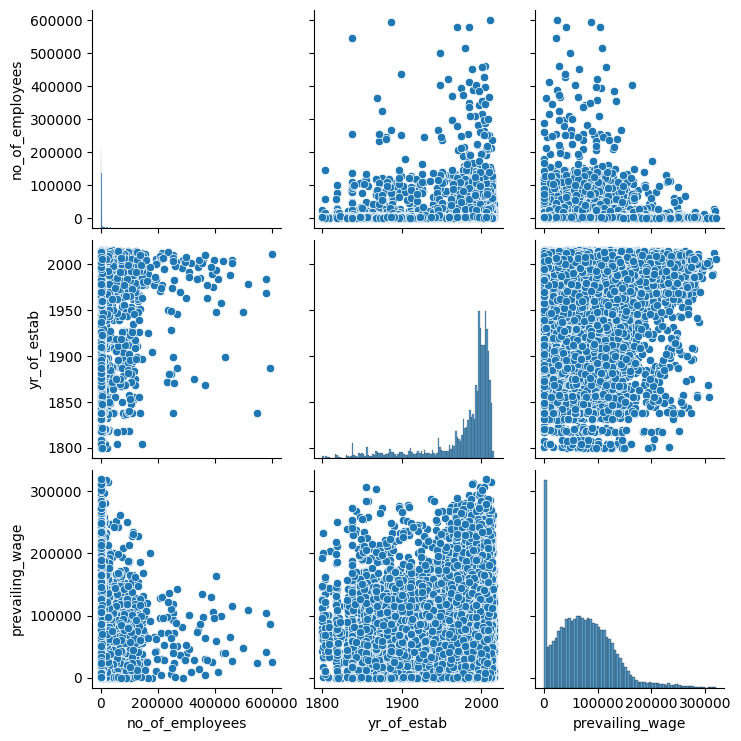

In [31]:
sns.pairplot(data)

In [33]:
# reegion

data['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

<Axes: xlabel='education_of_employee', ylabel='percent'>

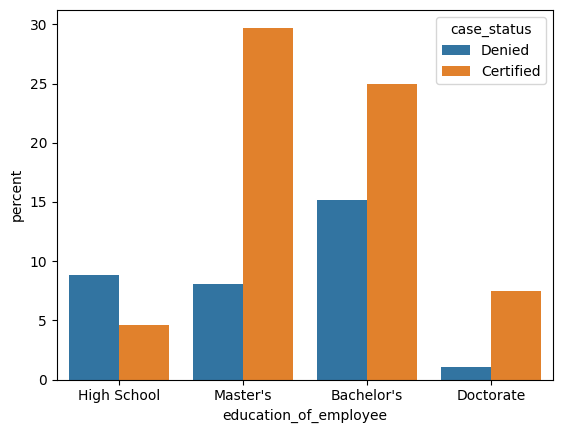

In [37]:
# experience vs status
sns.countplot(x='education_of_employee', data=data, hue='case_status', stat='percent')

TypeError: 'value' must be an instance of str or bytes, not a tuple

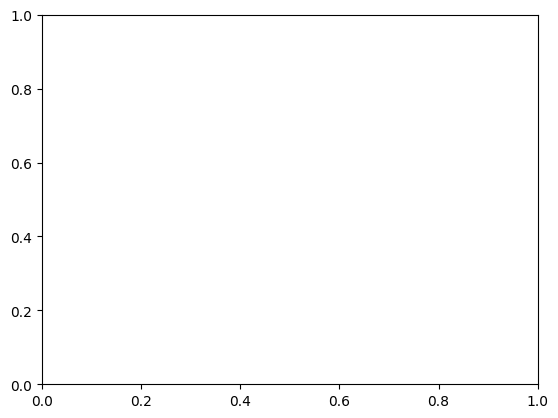

In [40]:
plt.plot(data.groupby(['education_of_employee', 'region_of_employment'])['case_status'].value_counts())

In [56]:
sns.countplot(x='region_of_employment', y='education_numerical', data=data, hue='case_status')
plt.show()

TypeError: Cannot pass values for both `x` and `y`.

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['education_numerical'] = encoder.fit_transform(data['education_of_employee']) + 1
data['education_numerical']

0        3
1        4
2        1
3        1
4        4
        ..
25475    1
25476    3
25477    4
25478    4
25479    1
Name: education_numerical, Length: 25480, dtype: int64

``` 
majoriyt of high school students are accepted in all reagions
in others education level more status are rejected than accepted 
```

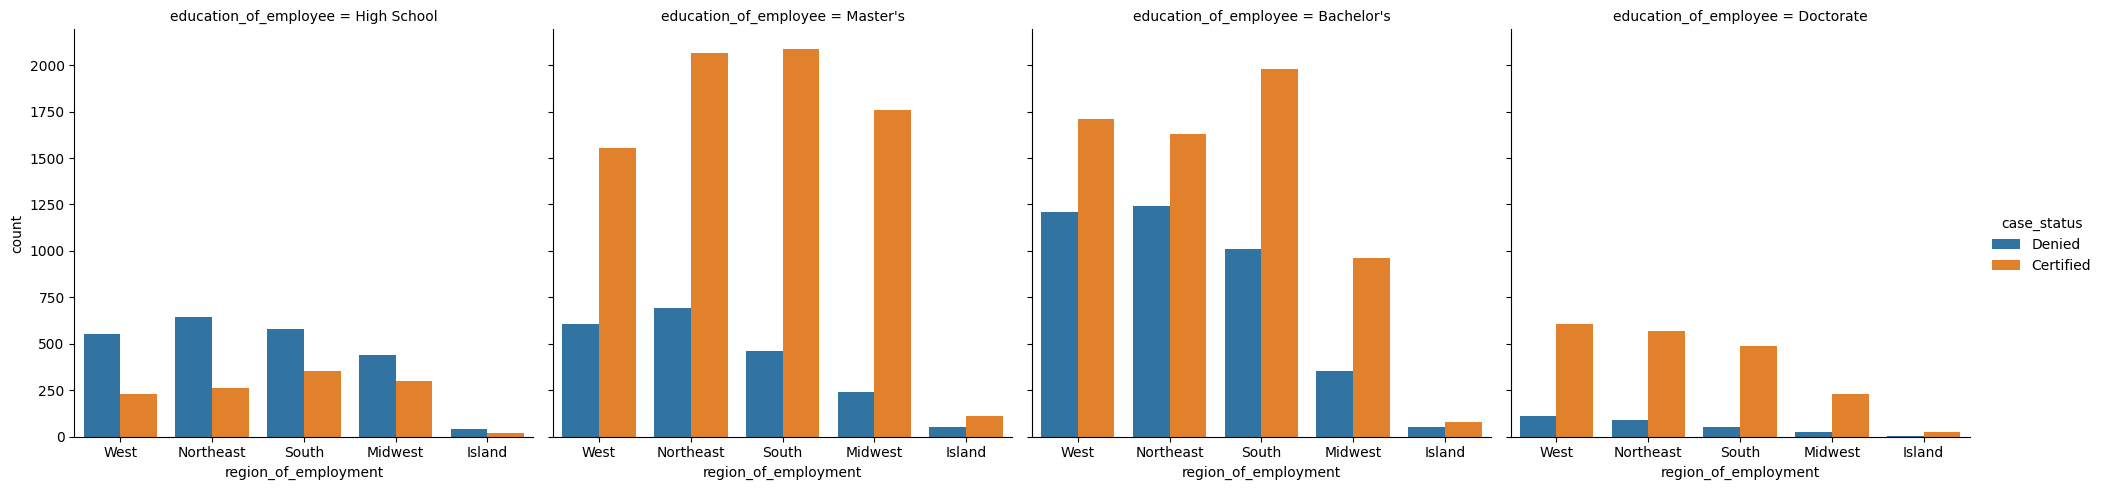

In [60]:
# sns.countplot(data.groupby('region_of_employment')['education_of_employee'])
sns.catplot(x='region_of_employment', y=None, hue='case_status', col='education_of_employee', data=data, kind='count')